In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
import matplotlib as mpl
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd

In [2]:
#model data
df=pd.read_csv('ex/data/days-simulated-v2.tsv')

In [3]:
#target structure: activity, duration, activity, duration, ...
df.head()

,day
0,"0,270,5,32,10,73,16,25,5,165,2,35,4,300,1,53,1..."
1,"4,150,16,7,4,623,16,5,8,35,16,20,5,30,2,10,8,1..."
2,"0,270,1,75,16,30,9,15,16,5,8,40,16,5,10,10,16,..."
3,"0,240,1,60,10,50,16,5,5,55,2,32,16,8,10,10,16,..."
4,"0,170,2,20,16,5,4,285,2,15,3,205,16,5,6,6,16,1..."


In [4]:
a=df.loc[430].values[0].split(',')

In [5]:
#activity sum duration (minues by day)
sum([int(a[i*2+1]) for i in range(len(a)/2)])

1440

In [6]:
df1=pd.read_csv('ex/1.csv')
df2=pd.read_csv('ex/2.csv')
df3=pd.read_csv('ex/3.csv')

In [7]:
df=pd.concat([df1,df2[1:],df3[1:]]) #no need for headers twice, df headers completely identical

In [8]:
#create weekday dataframe
hkoz=df[df.columns[9:489]].reset_index()

In [9]:
#create weekend dataframe
hetv=df[df.columns[489:969]].reset_index()

In [10]:
#create descriptive stats dataframe
desc=df[df.columns[969:]].reset_index()

In [11]:
#create survey metadata dataframe
time=df[df.columns[2:4]].reset_index()

In [12]:
#top 16 activity groups
activities=[['Alv\xc3\xa1s'],
['Zuhany / Mosd\xc3\xb3'],
['\xc3\x89tkez\xc3\xa9s', '\xc3\x89tterem/Vend\xc3\xa9gl\xc5\x91'],
[u'Munka (irodai)', 'Munka (k\xc3\xa9tkezi)'],
[u'Internet', u'Telefon/Chat/Facebook'],
['V\xc3\xa1s\xc3\xa1rl\xc3\xa1s'],
['Vall\xc3\xa1sgyakorl\xc3\xa1s','\xc3\x96nk\xc3\xa9ntess\xc3\xa9g'],
[u'TV/Film', u'Mozi'],
['Olvas\xc3\xa1s', '\xc3\x9ajs\xc3\xa1g/Keresztrejtv\xc3\xa9ny'],
['H\xc3\xa1zimunka/Gyerekfel\xc3\xbcgyelet'],
['Hivatalos elint\xc3\xa9znival\xc3\xb3k'],
[u'Sport', 'Edz\xc5\x91terem/Sz\xc3\xa9ps\xc3\xa9gszalon'],
['Egy\xc3\xa9b Hobby', 'PC j\xc3\xa1t\xc3\xa9k', 'Kert\xc3\xa9szked\xc3\xa9s/Bark\xc3\xa1csol\xc3\xa1s', 'Rokonl\xc3\xa1togat\xc3\xa1s',  'M\xc3\xa1s'],
['Tanul\xc3\xa1s',  'Mag\xc3\xa1n\xc3\xb3ra'],
['Sz\xc3\xb3rakoz\xc3\xb3hely/K\xc3\xa1v\xc3\xa9z\xc3\xb3/Pub'],
['S\xc3\xa9ta/Kutyas\xc3\xa9t\xc3\xa1ltat\xc3\xa1s', 'Term\xc3\xa9szet/Kir\xc3\xa1ndul\xc3\xa1s'],
['Utaz\xc3\xa1s/Vezet\xc3\xa9s']]

In [13]:
#bin activities into activity groups
actidict={}
for i in range(len(activities)):
    for j in range(len(activities[i])):
        actidict[activities[i][j]]=i

In [14]:
#binned activities into activity groups
for i in activities:
    for j in i:
        print j,
    print 

Alvás
Zuhany / Mosdó
Étkezés Étterem/Vendéglő
Munka (irodai) Munka (kétkezi)
Internet Telefon/Chat/Facebook
Vásárlás
Vallásgyakorlás Önkéntesség
TV/Film Mozi
Olvasás Újság/Keresztrejtvény
Házimunka/Gyerekfelügyelet
Hivatalos elintéznivalók
Sport Edzőterem/Szépségszalon
Egyéb Hobby PC játék Kertészkedés/Barkácsolás Rokonlátogatás Más
Tanulás Magánóra
Szórakozóhely/Kávézó/Pub
Séta/Kutyasétáltatás Természet/Kirándulás
Utazás/Vezetés


In [15]:
# run only once
hkoz.columns=hkoz.loc[0].values
hkoz=hkoz[1:].drop(0,axis=1)
hetv.columns=hetv.loc[0].values
hetv=hetv[1:].drop(0,axis=1)

In [16]:
#extract and linearize data from pandas dataframe
hkozdata={}
for i in hkoz.index:
    index=hkoz.loc[i].index
    values=hkoz.loc[i].values
    helper=[]
    for j in range(len(values)):
        if str(values[j]).lower()!='nan':
            helper.append(index[j])
    hkozdata[i]=helper                

In [17]:
#extract and linearize data from pandas dataframe
hetvdata={}
for i in hetv.index:
    index=hetv.loc[i].index
    values=hetv.loc[i].values
    helper=[]
    for j in range(len(values)):
        if str(values[j]).lower()!='nan':
            helper.append(index[j])
    hetvdata[i]=helper                

In [18]:
#create timematrix - timeslice:activity list
j=1
timematrix={}
for i in hkozdata[j]:
    activity=i[:i.find('-')-1]
    timeslice=i[i.find('-')+2:]
    if timeslice not in timematrix:timematrix[timeslice]=[]
    timematrix[timeslice].append(actidict[activity])

In [19]:
#create correct timeslice order to start day at 04:00
parseorder=np.roll(np.sort(timematrix.keys()),-2)

In [20]:
#create output list, with shared timeslots
output=[]
for k in range(len(parseorder)):
    helper=timematrix[parseorder[k]]
    np.random.shuffle(helper)
    output.append(helper[:3]) #max 3 activities within 90 minutes, but create 3 randomized persons

In [21]:
print output

[[0], [0, 1], [13], [13], [13, 2], [13], [13], [13], [2, 7, 4], [13], [13], [4, 2, 12], [0], [0], [0], [0]]


In [22]:
#create output CSV list: activity, duration, activity, duration, ...
output2=[]
fixed=90 # survey 90 min timeslices are fixed
for k in range(len(output)):
    for z in range(len(output[k])):
        output2.append(output[k][z])
        output2.append(fixed/(len(output[k])))
print output2

[0, 90, 0, 45, 1, 45, 13, 90, 13, 90, 13, 45, 2, 45, 13, 90, 13, 90, 13, 90, 2, 30, 7, 30, 4, 30, 13, 90, 13, 90, 4, 30, 2, 30, 12, 30, 0, 90, 0, 90, 0, 90, 0, 90]


In [23]:
#minutes in perfect day
sum([output2[i*2+1] for i in range(len(output2)/2)])

1440

In [24]:
#create output CSV list: activity, duration, activity, duration, ... including pruning
output2=[]
fixed=90 # survey 90 min timeslices are fixed
current=999
for k in range(len(output)):
    for z in range(len(output[k])):
        if output[k][z]!=current:
            current=output[k][z]
            output2.append(output[k][z])
            output2.append(fixed/(len(output[k]))-10+int(np.random.uniform(20))) #randomize a bit better movement
        else:
            output2[-1]+=fixed/(len(output[k]))        
print output2

[0, 140, 1, 48, 13, 234, 2, 50, 13, 272, 2, 24, 7, 30, 4, 33, 13, 173, 4, 34, 2, 24, 12, 26, 0, 351]


In [25]:
sum([output2[i*2+1] for i in range(len(output2)/2)])

1439

Parse all data

In [26]:
instances=2

In [27]:
#create timematrix - timeslice:activity list
output4=[]
for j in hkozdata:
    timematrix={}
    for i in hkozdata[j]:
        activity=i[:i.find('-')-1]
        timeslice=i[i.find('-')+2:]
        if timeslice not in timematrix:timematrix[timeslice]=[]
        timematrix[timeslice].append(actidict[activity])
    #create correct timeslice order to start day at 04:00
    parseorder=np.roll(np.sort(timematrix.keys()),-2)
    #create output list, with shared timeslots
    for x in range(instances): #create 3 randomized person-instances
        output=[]
        for k in range(len(parseorder)):
            helper=timematrix[parseorder[k]]
            np.random.shuffle(helper)
            output.append(helper[:3]) #max 3 activities within 90 minutes, but create 3 randomized persons
        #create output CSV list: activity, duration, activity, duration, ...
        output2=[]
        fixed=90 # survey 90 min timeslices are fixed
        current=999
        for k in range(len(output)):
            for z in range(len(output[k])):
                if output[k][z]!=current:
                    current=output[k][z]
                    output2.append(output[k][z])
                    output2.append(int(fixed*1.0/(len(output[k])))-10+int(np.random.uniform(20)))
                else:
                    output2[-1]+=fixed/(len(output[k])) 
        output4.append(str(output2)[1:-1].replace(' ',''))

In [28]:
savedata=pd.DataFrame(output4)
savedata.columns=['day']

In [29]:
savedata.to_csv('hkoz.csv',index=False)

In [30]:
#create timematrix - timeslice:activity list
output5=[]
for j in hetvdata:
    timematrix={}
    for i in hetvdata[j]:
        activity=i[:i.find('-')-1]
        timeslice=i[i.find('-')+2:]
        if timeslice not in timematrix:timematrix[timeslice]=[]
        timematrix[timeslice].append(actidict[activity])
    #create correct timeslice order to start day at 04:00
    parseorder=np.roll(np.sort(timematrix.keys()),-2)
    #create output list, with shared timeslots
    for x in range(instances): #create 3 randomized person-instances
        output=[]
        for k in range(len(parseorder)):
            helper=timematrix[parseorder[k]]
            np.random.shuffle(helper)
            output.append(helper[:3]) #max 3 activities within 90 minutes, but create 3 randomized persons
        #create output CSV list: activity, duration, activity, duration, ...
        output2=[]
        fixed=90 # survey 90 min timeslices are fixed
        current=999
        for k in range(len(output)):
            for z in range(len(output[k])):
                if output[k][z]!=current:
                    current=output[k][z]
                    output2.append(output[k][z])
                    output2.append(int(fixed*1.0/(len(output[k])))-10+int(np.random.uniform(20)))
                else:
                    output2[-1]+=fixed/(len(output[k])) 
        output5.append(str(output2)[1:-1].replace(' ',''))

In [31]:
savedata=pd.DataFrame(output5)
savedata.columns=['day']

In [32]:
savedata.to_csv('hetv.csv',index=False)

In [33]:
len(savedata)

532

Plots

In [34]:
colorsdict={
"0": "#e0d400",
"1": "#1c8af9",
"2": "#51BC05",
"3": "#FF7F00",
"4": "#DB32A4",
"5": "#00CDF8",
"6": "#E63B60",
"7": "#8E5649",
"8": "#68c99e",
"9": "#a477c8",
"10": "#5C76EC",
"11": "#E773C3",
"12": "#799fd2",
"13": "#038a6c",
"14": "#cc87fa",
"15": "#ee8e76",
"16": "#bbbbbb",
}

In [35]:
colors=[colorsdict[str(i)] for i in range(len(colorsdict))]

In [36]:
mdata=[]
mlen=[]
for k in range(len(output4)):
    z=np.array(output4[k].split(',')).astype(int)
    data=[]
    for i in range(len(z)/2):
        for j in range(z[i*2+1]):
            data.append(z[i*2])
    print len(data),
    mdata.append(data)
    mlen.append(len(data))
print
print np.average(mlen)

1428 1437 1120 1071 979 996 1332 1378 1374 1423 1411 1384 1405 1423 1403 1325 1472 1413 1415 1433 1365 1351 1397 1437 1416 1420 1465 1428 1416 1431 1456 1454 1500 1464 1493 1411 1431 1450 1444 1481 1481 1420 1396 1404 1433 1431 1430 1413 1424 1453 1423 1418 1452 1400 1443 1412 1460 1424 1436 1445 1467 1444 1441 1422 1454 1435 1430 1441 1359 1349 1346 1347 1407 1462 1479 1419 1497 1431 190 179 1436 1433 1425 1453 1444 1415 1349 1364 1368 1422 1428 1421 1427 1439 1417 1438 1473 1441 1432 1439 1328 1358 1472 1427 1492 1422 1248 1331 1419 1461 1370 1335 1115 1059 1456 1476 1404 1469 1478 1409 1459 1427 1278 1236 275 269 1347 1377 1436 1471 1421 1469 1443 1412 1455 1411 1411 1419 946 963 1363 1337 1329 1362 1421 1466 1428 1455 1413 1455 1483 1482 1418 1442 1475 1493 1447 1404 1411 1450 819 845 1413 1420 1450 1446 1415 1437 1440 1425 1356 1316 1456 1451 1417 1437 1395 1452 1437 1450 1284 1259 1390 1360 1363 1366 1466 1411 827 813 1350 1321 1449 1421 1422 1424 1414 1456 1443 1447 1406 1445 12

In [37]:
df=pd.DataFrame(mdata)
histdata=[]
for i in range(len(df.columns)):
    a=np.histogram(df[df.columns[i]],bins=17,range=[-0.5,16.5],normed=True)
    histdata.append(a[0])
df=pd.rolling_mean(pd.DataFrame(histdata),60,center=True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=True).mean()


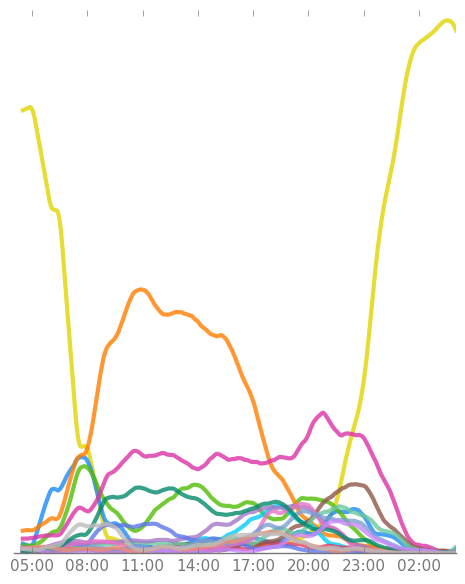

In [38]:
fig,ax=plt.subplots(1,1,figsize=(5,6))
df.plot(legend=False,ax=ax,lw=3,alpha=0.8,color=colors)
plt.rcParams['figure.facecolor'] = 'None'
plt.rcParams['axes.facecolor'] = 'None'
#plt.axis('off')
plt.xlim(0,1440)
ax.set_xticks([0,180,360,540,720,900,1080,1260,1440])
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
ax.spines['bottom'].set_color('#777777')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.label.set_color('#777777')
ax.tick_params(axis='x', colors='#777777')

fig.tight_layout()
ax.get_yaxis().set_visible(False)
plt.savefig('hkoz3.png',facecolor='None',edgecolor='None')
plt.show()

In [39]:
time['sd']=pd.to_datetime(time['Start Date'])
time['ed']=pd.to_datetime(time['End Date'])

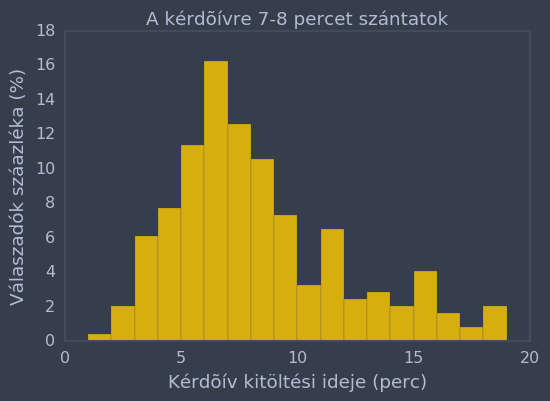

In [40]:
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
plt.hist([(time['ed'].sub(time['sd'], axis=0))[1:][i].total_seconds()/60.0 for i in range(1,len(time))],
         range=[0,20],bins=range(20),normed=True,color='#ffcc00',alpha=0.8)
plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Válaszadók száazléka (%)")
plt.title(u"A kérdõívre 7-8 percet szántatok")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))

In [41]:
act_codes = [
	{"index": "15", "short": u"Kutya", "desc": u"Sétáltatás | Természet"},
	{"index": "3", "short": u"Meló", "desc": u"Munka (irodai | kétkezi)"},
	{"index": "7", "short": u"TV", "desc": u"TV | Film | Mozi"},
	{"index": "5", "short": u"Vásárlás", "desc": u"Vásárlás | Mall"},
	{"index": "6", "short": u"Áhítat", "desc": u"Vallásgyakorlás | Önkéntesség"},
	{"index": "4", "short": u"Net", "desc": u"Internet | Telefon | Facebook"},
	{"index": "1", "short": u"Zuhany", "desc": u"Zuhany | Mosdó"},
	{"index": "8", "short": u"Olvasás", "desc": u"Könyv | Újság | Keresztrejtvény"},
	{"index": "9", "short": u"Otthon", "desc": u"Házimunka | Gyerekfelügyelet"},
	{"index": "0", "short": u"Szundi", "desc": u"Alvás"},
	{"index": "11", "short": u"Sport", "desc": u"Edzés | Edzőterem | Szaladás"},
	{"index": "12", "short": u"Hobby", "desc": u"Kertészkedés | Barkácsolás | Rokonok"},
	{"index": "2", "short": u"Kaja", "desc": u"Étkezés | Étterem"},
	{"index": "14", "short": u"Sör", "desc": u"Kávézó | Pub | Szórakozóhely"},
	{"index": "13", "short": u"Suli", "desc": u"Tanulás | Magánóra"},
	{"index": "10", "short": u"Hivatal", "desc": u"Hivatalos elintéznivalók"},
	{"index": "16", "short": u"Úton", "desc": u"Utazás | Vezetés"},
]

In [42]:
labels={i['index']:i['short'] for i in act_codes}

In [47]:
df.columns

RangeIndex(start=0, stop=17, step=1)

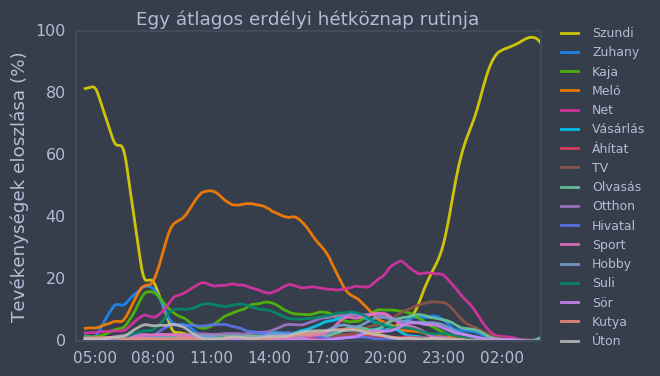

In [43]:
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
for i in df.columns:
    plt.plot(df[i],label=labels[str(i)],color=colors[i],alpha=0.9,lw=2)
plt.xlim(0,1440)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétköznap rutinja")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend(bbox_to_anchor=(1.25, 1.05),fontsize=9)
plt.show()

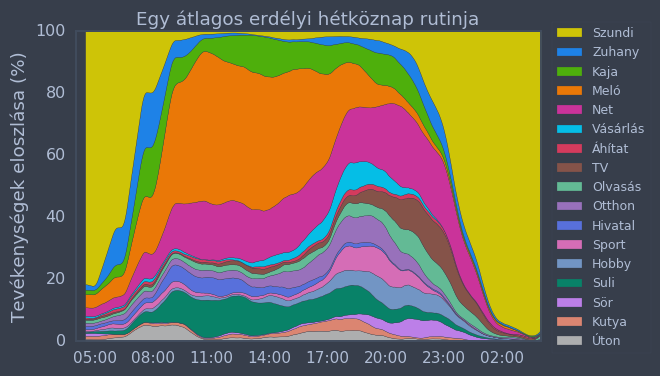

In [44]:
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
toplot=[]
tolabel=[]
for i in df.columns[::-1]:
    toplot.append(df[i])
    tolabel.append(labels[str(i)])
plt.stackplot(df.index,toplot,colors=colors[::-1],alpha=0.9,labels=tolabel)
plt.xlim(0,1440)
plt.ylim(0,1)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétköznap rutinja")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend()
#reverse legend order
handles, labls = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labls[::-1], bbox_to_anchor=(1.25, 1.05),fontsize=9)
plt.show()

In [46]:
desc

,index,"Ha MÁS-t is ikszeltél a kérdéseknél, itt leírhatod mire gondoltál (opcionális)",Életkor,Nem,Környezet,Megjegyzések
0,0,Open-Ended Response,Response,Response,Response,Open-Ended Response
1,1,NaN,18-25,Férfi,Vidék (Románia),NaN
2,2,NaN,18-25,Nő,Vidék (Románia),NaN
3,3,NaN,18-25,Nő,Vidék (Románia),NaN
4,4,NaN,25-35,Férfi,Kisváros (Románia),NaN
5,5,NaN,18-25,Férfi,Nem szeretném megadni,"A környezet változó lévén,hogy egyetemista vag..."
6,6,NaN,25-35,Férfi,Kisváros (Románia),NaN
7,7,NaN,45-55,Férfi,Vidék (Románia),NaN
8,8,NaN,25-35,Férfi,Külföld,NaN
9,9,NaN,25-35,Férfi,Kisváros (Románia),NaN
